In [46]:
import pandas as pd
import numpy as np
import os

In [47]:
from logging import exception
file_path = '/content/GS_Pending.csv'

In [48]:
try:
  df = pd.read_csv(file_path, encoding='latin1')
except Exception as e:
  df = pd.read_csv(file_path, encoding='utf-8')
except Exception as e:
    print(f'Error reading the CSV file:{e}')

In [49]:
df.sample(15)

,Date,MRR_Category,MRR_NO,Factory,Category,Group,Custom_Code,Item,UOM,Qty,Price_TK,Total_Amount_TK
279,24-Mar-2025,Woven,MGSL-MRR-2503020,MGSL,Stationery,Stationery,9671,Bowl,Set,5,52,260
658,11-Mar-2025,Sweater,MGSL-MRR-2503005,MGSL,Stationery,First Aid Equipment,10742,Neostrip,Box,1,100,100
1169,29-Jun-2025,Woven,MGSL-MRR-2506023,MGSL,Stationery,Accessories,9429,Magic Thread,Cone,21,145,"3,045.00"
388,22-Jan-2025,Woven,MGNFL-2-MRR-2507007,MGNFL,Compliance,Fire,10624,New supply of ABC valve,Piece,4,280,"1,120.00"
1442,24-Apr-2025,Woven,MGSL-MRR-2504024,MGSL,Chemical,Maintenance,9234,Diesel,Liter,1000,105,"105,000.00"
1215,12-Feb-2025,Sweater,MFSL-MRR-2503009,MFSL,Stationery,Printing Stationary,8846,Printer Toner-107 Asta,Piece,2,"1,900.00","3,800.00"
1297,22-Jan-2025,Woven,MGNFL-2-MRR-2507007,MGNFL,Compliance,Compliance,9779,New Supply Of Inner Spindle Pin,Piece,13,80,"1,040.00"
1420,18-May-2025,Woven,MGSL-DK-MRR-2505005,MGSL,Stationery,Stationery,10871,Candle,Piece,100,15,"1,500.00"
566,18-Apr-2025,Woven,MGNSL-MRR-2504004,MGNSL,Stationery,Kitchen,9669,plate,Piece,250,64.44,"16,110.00"
1022,28-Jul-2025,Sweater,MGSL-MRR-2507024,MGSL,Stationery,First Aid Equipment,10725,Ace Plus Tablet 500mg,Piece,50,2.5,125


In [50]:
df.isnull()

,Date,MRR_Category,MRR_NO,Factory,Category,Group,Custom_Code,Item,UOM,Qty,Price_TK,Total_Amount_TK
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1639,False,False,False,False,False,False,False,False,False,False,False,False
1640,False,False,False,False,False,False,False,False,False,False,False,False
1641,False,False,False,False,False,False,False,False,False,False,False,False
1642,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             1644 non-null   object
 1   MRR_Category     1644 non-null   object
 2   MRR_NO           1644 non-null   object
 3   Factory          1644 non-null   object
 4   Category         1644 non-null   object
 5   Group            1644 non-null   object
 6   Custom_Code      1644 non-null   int64 
 7   Item             1644 non-null   object
 8   UOM              1644 non-null   object
 9   Qty              1644 non-null   int64 
 10  Price_TK         1644 non-null   object
 11  Total_Amount_TK  1644 non-null   object
dtypes: int64(2), object(10)
memory usage: 154.3+ KB


In [52]:
df.describe(include='all')

,Date,MRR_Category,MRR_NO,Factory,Category,Group,Custom_Code,Item,UOM,Qty,Price_TK,Total_Amount_TK
count,1644,1644,1644,1644,1644,1644,1644.000000,1644,1644,1644.000000,1644,1644
unique,141,2,482,8,8,42,NaN,386,28,NaN,185,288
top,03-May-2025,Sweater,MGSL-DK-MRR-2508003,MGSL,Maintenance,Maintenance,NaN,Diesel,Piece,NaN,0,0
freq,98,822,62,762,666,368,NaN,164,978,NaN,90,90
mean,NaN,NaN,NaN,NaN,NaN,NaN,9762.254258,NaN,NaN,2507.482968,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1363.107107,NaN,NaN,49278.270906,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,5051.000000,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,9234.000000,NaN,NaN,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,9669.000000,NaN,NaN,6.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,10541.000000,NaN,NaN,36.000000,NaN,NaN


In [53]:
unique_items_per_category = df.groupby('MRR_Category')['Item'].nunique()
display(unique_items_per_category)

,Item
MRR_Category,
Sweater,386
Woven,386


In [54]:
qty_item = df.groupby('Item')[['Qty','Price_TK',]].sum()
display(qty_item)

,Qty,Price_TK
Item,,
1.5 RM BRB Cable,20,"3,386.003,386.00"
"1/4"" Air Nipple",4,5050
14 mm Cable Clip,6,9595
2 Gang Switch,10,120120
3 Pin Plug,24,6565
...,...,...
YELLOW PLUS 250 ML,2,443443
Yellow Kham,1200,22
cutter,20,1010


/tmp/ipython-input-235539074.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qty', y='Item', data=top_10_items, palette='viridis')


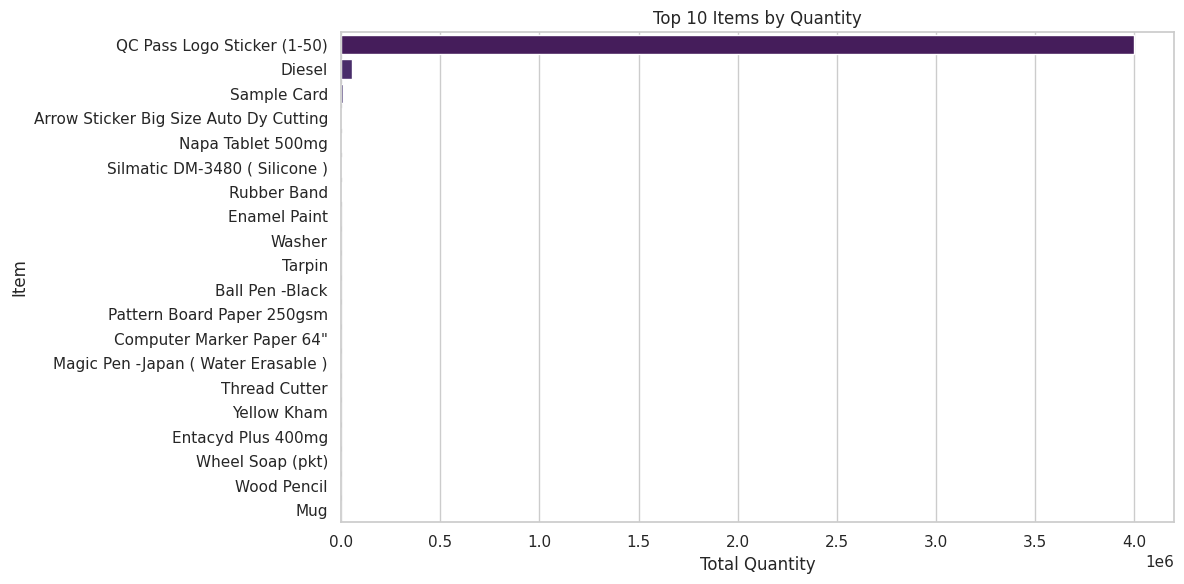

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total quantity per item
item_quantities = df.groupby('Item')['Qty'].sum().reset_index()

# Get the top 10 items by quantity
top_10_items = item_quantities.nlargest(20, 'Qty')

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Qty', y='Item', data=top_10_items, palette='viridis')
plt.title('Top 10 Items by Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

In [56]:
df.head(10)

,Date,MRR_Category,MRR_NO,Factory,Category,Group,Custom_Code,Item,UOM,Qty,Price_TK,Total_Amount_TK
0,20-May-2025,Sweater,MGNSL-MRR-2505040,MGNSL,Maintenance,Utility Maintenance,10283,Silver Paint,Liter,2,240,480
1,26-Jul-2025,Sweater,MGNSL-MRR-2508017,MGNSL,Stationery,Stationery,9848,Emary Paper,Piece,10,30,300
2,31-May-2025,Sweater,MGSL-MRR-2505076,MGSL,Maintenance,Electric Goods,9985,Welding Goggles,Piece,3,70,210
3,26-Feb-2025,Woven,MGNSL-MRR-2503002,MGNSL,Stationery,Accessories,9429,Magic Thread,Cone,8,380,"3,040.00"
4,28-Jan-2025,Woven,MGNSL-MRR-2501002,MGNSL,Stationery,Toiletries,9219,Facial Tissue,Piece,8,70,560
5,16-Nov-2024,Sweater,MGKFL-MRR-2507017,MGKFL,Compliance,Fire,10618,"ABC fire extinguisher refilling & servicing, c...",Piece,5,475,"2,375.00"
6,18-Feb-2025,Sweater,MGSL-MRR-2502028,MGSL,Stationery,Accessories,9429,Magic Thread,Cone,11,180,"1,980.00"
7,27-Jul-2025,Woven,TMLS-MRR-2507008,TMLS,Stationery,Stationery,9501,Pattern Board Paper 250gsm,KG,240,170,"40,800.00"
8,27-Jan-2025,Sweater,MGNFL-MRR-2502015,MGNFL,Maintenance,Utility Maintenance,9939,Enamel Paint ( Color ),Liter,1,420,420
9,16-Nov-2024,Woven,MGKFL-MRR-2507017,MGKFL,Compliance,Compliance,9783,New Supply Of ABC Meter,Piece,1,190,190


In [59]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

MessageError: Error: credential propagation was unsuccessful

/tmp/ipython-input-1335139691.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Qty', y='MRR_Category', inner='box', palette='Dark2')


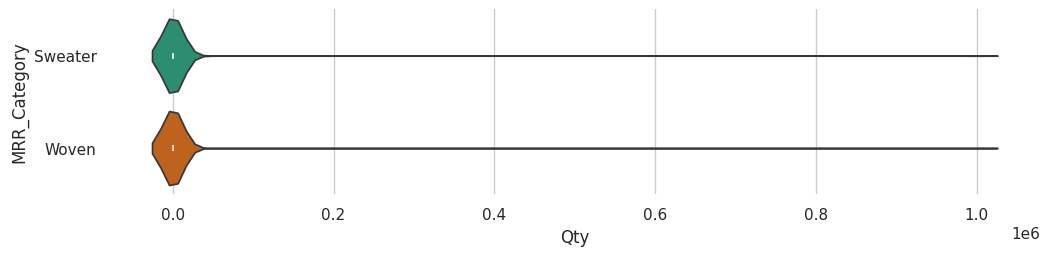

In [58]:
# @title MRR_Category vs Qty

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MRR_Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Qty', y='MRR_Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-2181946443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Custom_Code', y='MRR_Category', inner='box', palette='Dark2')


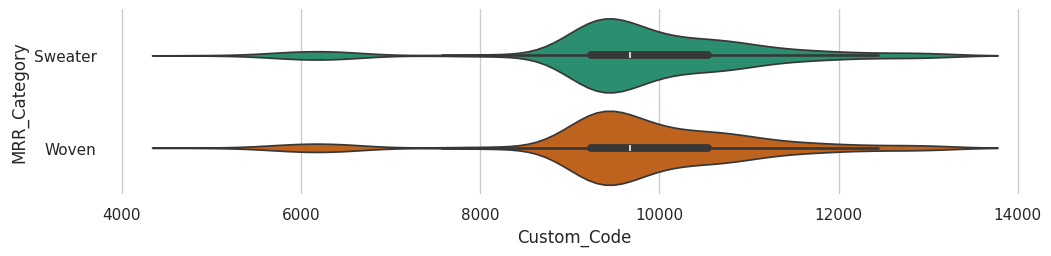

In [57]:
# @title MRR_Category vs Custom_Code

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MRR_Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Custom_Code', y='MRR_Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

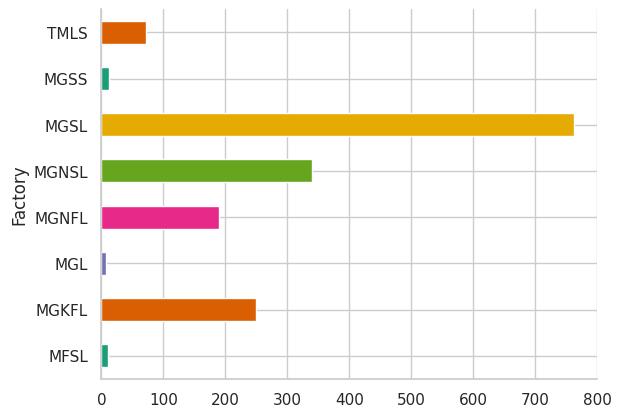

In [45]:
# @title Factory

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Factory').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-524508801.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


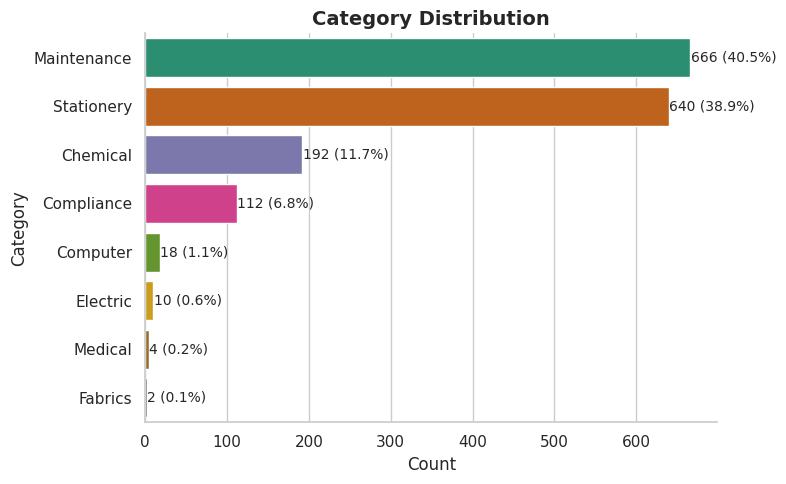

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data (sorted by count)
category_counts = df['Category'].value_counts()

# Set style
sns.set_theme(style="whitegrid")

# Create plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=category_counts.values,
    y=category_counts.index,
    palette="Dark2"
)

# Add labels to bars
for i, v in enumerate(category_counts.values):
    ax.text(v + 0.5, i, f"{v:,} ({v/category_counts.sum():.1%})", va='center', fontsize=10)

# Titles and labels
plt.title("Category Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Category", fontsize=12)

# Remove spines for cleaner look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2861029499.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


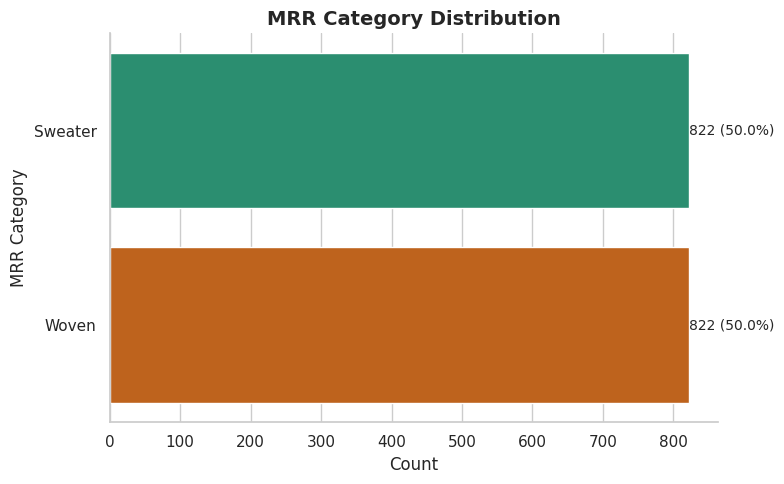

In [43]:
# Prepare data
mrr_counts = df['MRR_Category'].value_counts()

# Style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=mrr_counts.values,
    y=mrr_counts.index,
    palette="Dark2"
)

# Add labels to each bar
for i, v in enumerate(mrr_counts.values):
    ax.text(v + 0.5, i, f"{v:,} ({v/mrr_counts.sum():.1%})", va='center', fontsize=10)

# Titles and labels
plt.title("MRR Category Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("MRR Category", fontsize=12)

# Clean up
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()


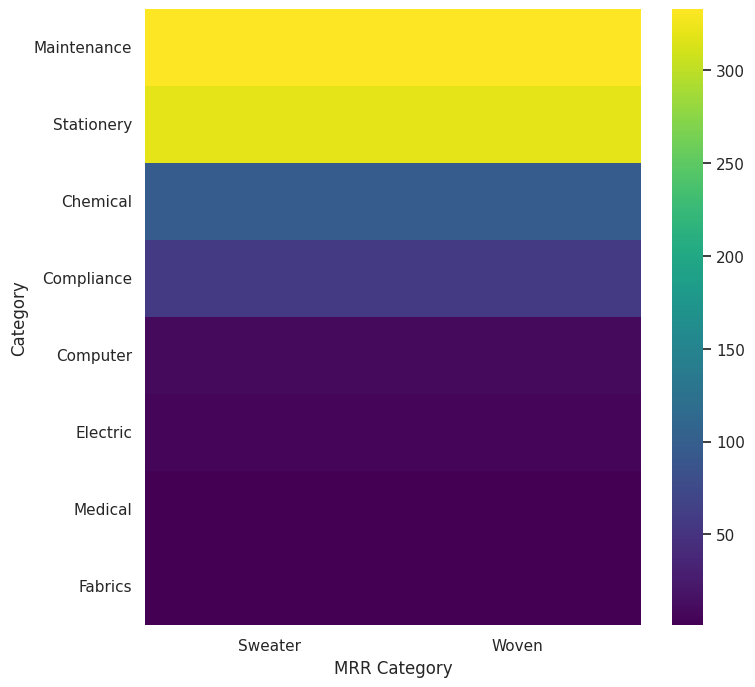

In [44]:
# @title MRR Category vs Category

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Category'].value_counts()
    for x_label, grp in df.groupby('MRR_Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MRR Category')
_ = plt.ylabel('Category')

In [60]:
df.columns

Index(['Date', 'MRR_Category', 'MRR_NO', 'Factory', 'Category', 'Group',
       'Custom_Code', 'Item', 'UOM', 'Qty', 'Price_TK', 'Total_Amount_TK'],
      dtype='object')

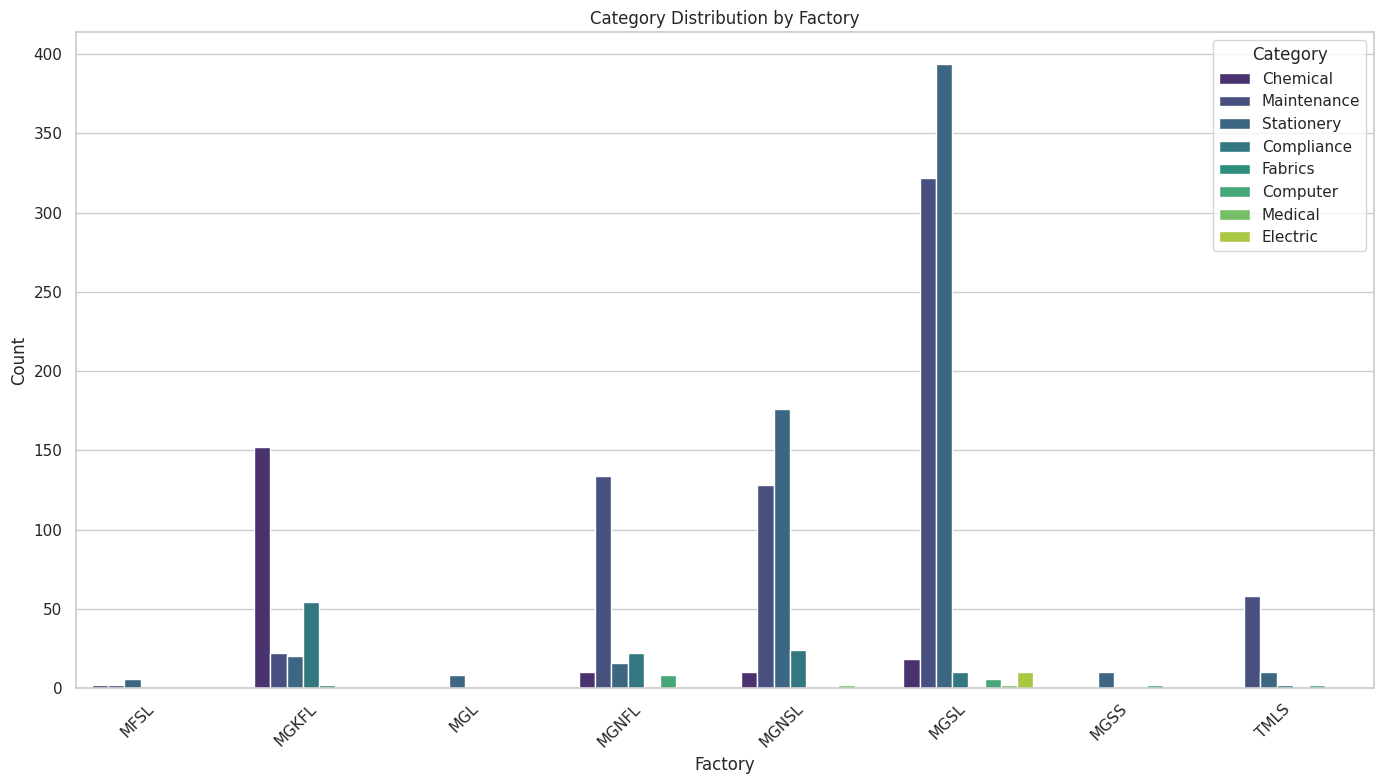

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Factory and Category and count occurrences
factory_category_counts = df.groupby(['Factory', 'Category']).size().reset_index(name='Count')

# Create a grouped bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Factory', y='Count', hue='Category', data=factory_category_counts, palette='viridis')
plt.title('Category Distribution by Factory')
plt.xlabel('Factory')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

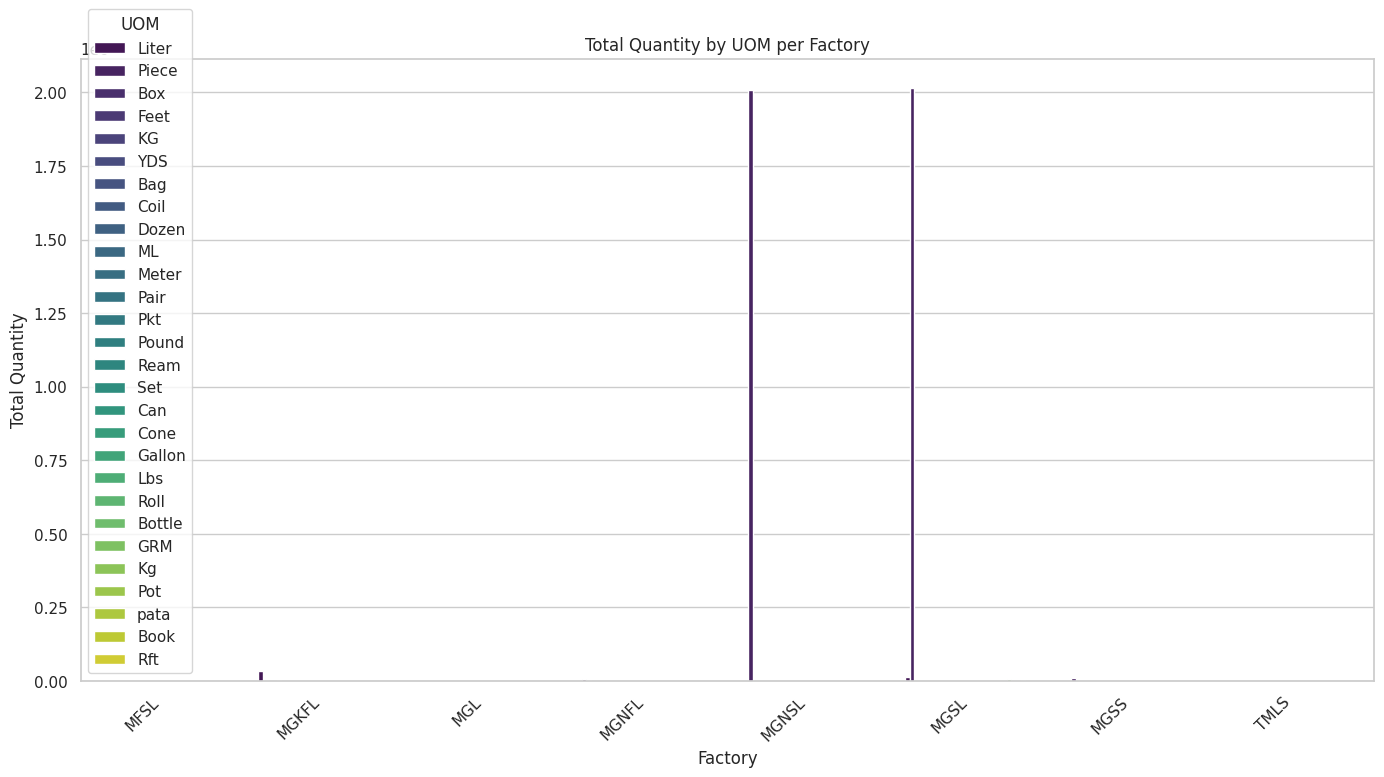

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Factory and UOM and sum the Quantity
factory_uom_qty = df.groupby(['Factory', 'UOM'])['Qty'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Factory', y='Qty', hue='UOM', data=factory_uom_qty, palette='viridis')
plt.title('Total Quantity by UOM per Factory')
plt.xlabel('Factory')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
df.columns

Index(['Date', 'MRR_Category', 'MRR_NO', 'Factory', 'Category', 'Group',
       'Custom_Code', 'Item', 'UOM', 'Qty', 'Price_TK', 'Total_Amount_TK'],
      dtype='object')

,Qty,Price_TK,Total_Amount_TK
MRR_NO,,,
MFSL-MRR-2503003,2,0.00,0.00
MFSL-MRR-2503004,200,0.00,0.00
MFSL-MRR-2503009,8,0.00,0.00
MFSL-MRR-2507004,880,0.00,0.00
MGKFL-MRR-2501001,20,208.00,1980.16
...,...,...,...
TMLS-MRR-2507006,56,32.14,900.00
TMLS-MRR-2507007,10,150.00,420.00
TMLS-MRR-2507008,480,340.00,0.00


# Task
Visualize Factory wise MRR_No with Qty and Total_Amount from the file "GS_Pending.csv".

## Prepare data

### Subtask:
Group the dataframe by `Factory` and `MRR_NO`, and sum the `Qty` and `Total_Amount_TK`.


**Reasoning**:
Group the dataframe by `Factory` and `MRR_NO` and calculate the sum of `Qty` and `Total_Amount_TK`.



In [66]:
factory_mrr_summary = df.groupby(['Factory', 'MRR_NO'])[['Qty', 'Total_Amount_TK']].sum()
display(factory_mrr_summary)

Qty  Total_Amount_TK
Factory MRR_NO                                 
MFSL    MFSL-MRR-2503003     2             0.00
        MFSL-MRR-2503004   200             0.00
        MFSL-MRR-2503009     8             0.00
        MFSL-MRR-2507004   880             0.00
MGKFL   MGKFL-MRR-2501001   20          1980.16
...                        ...              ...
TMLS    TMLS-MRR-2507006    56           900.00
        TMLS-MRR-2507007    10           420.00
        TMLS-MRR-2507008   480             0.00
        TMLS-MRR-2507009     2          1000.00
        TMLS-MRR-2508002    10             0.00

[482 rows x 2 columns]

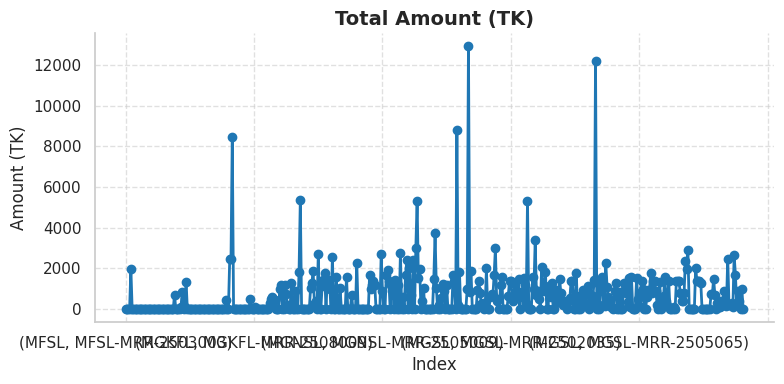

In [71]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 4))
factory_mrr_summary['Total_Amount_TK'].plot(
    kind='line',
    marker='o',   # add markers to points
    color='tab:blue',
    linewidth=2
)

plt.title('Total Amount (TK)', fontsize=14, fontweight='bold')
plt.xlabel('Index', fontsize=12)
plt.ylabel('Amount (TK)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)  # light grid
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


## Visualize data

### Subtask:
Visualize the total quantity and total amount for each MRR_NO within each factory. Since there are many unique MRR_NO values, consider visualizing the top MRR_NOs per factory or using a different visualization approach.


**Reasoning**:
The previous attempt to visualize all MRR_NOs using a grouped bar plot was not effective due to the large number of unique MRR_NO values. To address this, I will select the top 5 MRR_NO entries for each Factory based on 'Total_Amount_TK' and then create a grouped bar plot to visualize this subset of data.



**Reasoning**:
The error "ValueError: cannot insert Factory, already exists" indicates that 'Factory' is already an index level in `factory_mrr_summary`. When using `reset_index()`, it tries to add 'Factory' as a column, but it's already present as an index. To fix this, I will explicitly name the levels when resetting the index or avoid resetting the 'Factory' level since it's already a column after the initial grouping. I'll adjust the reset_index call to correctly handle the multi-level index.



**Reasoning**:
The error message "ValueError: The name Factory occurs multiple times, use a level number" indicates that when resetting the index, pandas is finding 'Factory' as both a level name and a column name, and is confused. I need to explicitly specify the level number instead of the name to resolve this ambiguity during the `reset_index()` call. I will use the level number corresponding to 'Factory' in the multi-index.



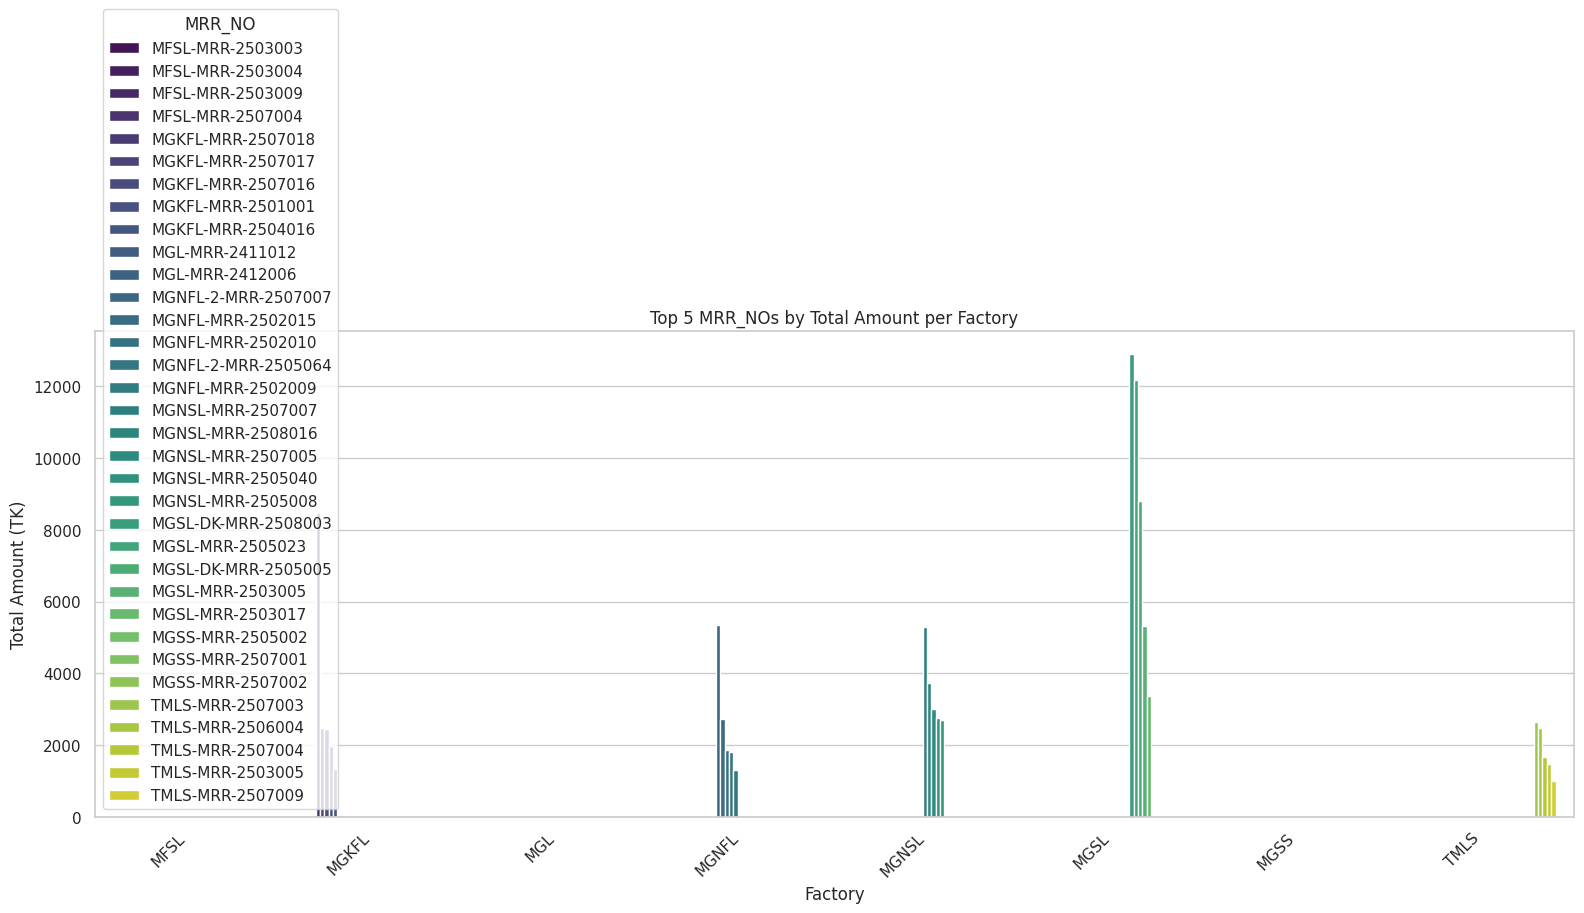

In [69]:
# Select top N MRR_NOs per factory based on Total_Amount_TK
top_n = 5
# Reset only the MRR_NO level which is at index 1
top_mrr_per_factory = factory_mrr_summary.groupby('Factory').apply(lambda x: x.nlargest(top_n, 'Total_Amount_TK')).reset_index(level=1)

# Create a grouped bar plot for the subset
plt.figure(figsize=(16, 8))
sns.barplot(x='Factory', y='Total_Amount_TK', hue='MRR_NO', data=top_mrr_per_factory, palette='viridis')
plt.title(f'Top {top_n} MRR_NOs by Total Amount per Factory')
plt.xlabel('Factory')
plt.ylabel('Total Amount (TK)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-436843223.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


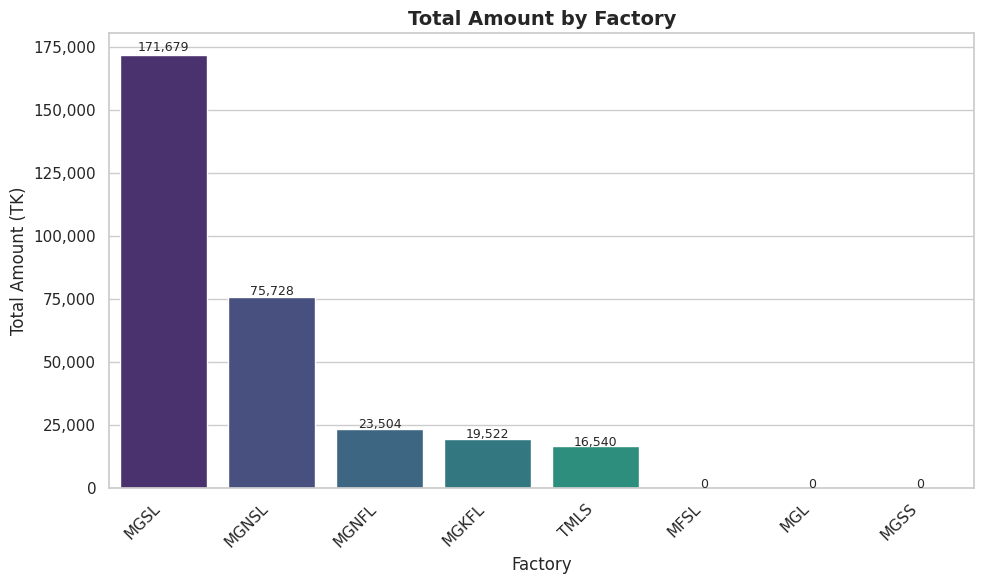

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Prepare data (sorted by amount)
factory_total_amount = (
    df.groupby('Factory')['Total_Amount_TK']
    .sum()
    .reset_index()
    .sort_values('Total_Amount_TK', ascending=False)
)

# Set style
sns.set_theme(style="whitegrid")

# Create plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Factory',
    y='Total_Amount_TK',
    data=factory_total_amount,
    palette='viridis'
)

# Add value labels on bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,   # x position
        p.get_height() + (p.get_height() * 0.01),  # y position
        f"{p.get_height():,.0f}",        # formatted value
        ha='center',
        fontsize=9
    )

# Titles and labels
plt.title('Total Amount by Factory', fontsize=14, fontweight='bold')
plt.xlabel('Factory', fontsize=12)
plt.ylabel('Total Amount (TK)', fontsize=12)

# Rotate x labels
plt.xticks(rotation=45, ha='right')

# Format y-axis with commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


In [76]:
df.columns

Index(['Date', 'MRR_Category', 'MRR_NO', 'Factory', 'Category', 'Group',
       'Custom_Code', 'Item', 'UOM', 'Qty', 'Price_TK', 'Total_Amount_TK'],
      dtype='object')

In [77]:
# Group by UOM and sum Qty and Price_TK
uom_summary = df.groupby('UOM')[['Qty', 'Price_TK']].sum()

# Display the result
display(uom_summary)

,Qty,Price_TK
UOM,,
Bag,56,5460.00
Book,600,0.00
Bottle,44,310.00
Box,770,6987.60
Can,8,6700.00
Coil,40,1440.00
Cone,784,24406.68
Dozen,144,2502.00
Feet,1772,349.00


from matplotlib import pyplot as plt
uom_summary['Qty'].plot(kind='hist', bins=20, title='Qty')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
uom_summary['Price_TK'].plot(kind='hist', bins=20, title='Price_TK')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
uom_summary.plot(kind='scatter', x='Qty', y='Price_TK', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
uom_summary['Qty'].plot(kind='line', figsize=(8, 4), title='Qty')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
uom_summary['Price_TK'].plot(kind='line', figsize=(8, 4), title='Price_TK')
plt.gca().spines[['top', 'right']].set_visible(False)

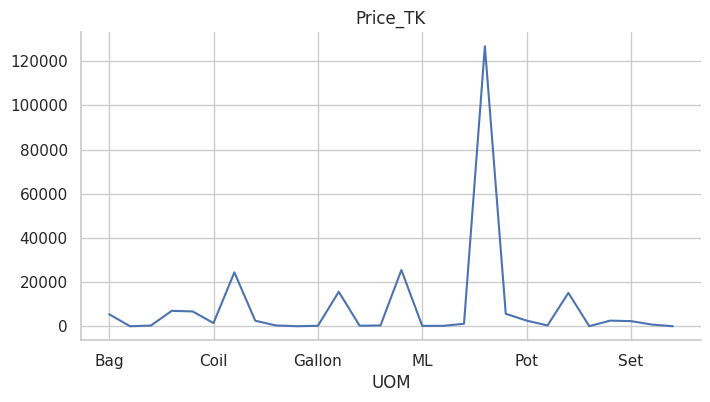

In [78]:
from matplotlib import pyplot as plt
uom_summary['Price_TK'].plot(kind='line', figsize=(8, 4), title='Price_TK')
plt.gca().spines[['top', 'right']].set_visible(False)

/tmp/ipython-input-1914217351.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


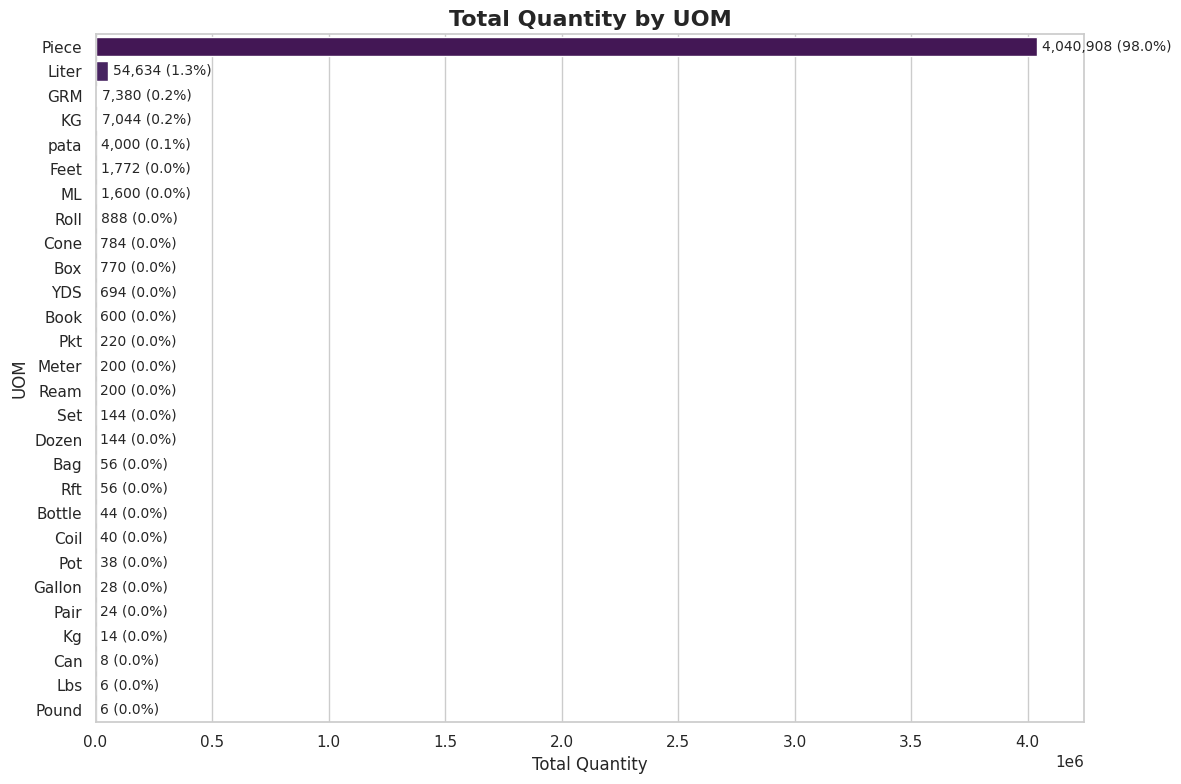

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
uom_qty = (
    df.groupby('UOM')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)
total_qty = uom_qty['Qty'].sum()

# Style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Qty',
    y='UOM',
    data=uom_qty,
    palette='viridis'
)

# Add labels
for i, (value, uom) in enumerate(zip(uom_qty['Qty'], uom_qty['UOM'])):
    ax.text(
        value + total_qty * 0.005,  # small offset
        i,
        f"{value:,.0f} ({value/total_qty:.1%})",
        va='center',
        fontsize=10
    )

# Titles and labels
plt.title('Total Quantity by UOM', fontsize=16, fontweight='bold')
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('UOM', fontsize=12)

plt.tight_layout()
plt.show()


In [83]:
df.columns

Index(['Date', 'MRR_Category', 'MRR_NO', 'Factory', 'Category', 'Group',
       'Custom_Code', 'Item', 'UOM', 'Qty', 'Price_TK', 'Total_Amount_TK'],
      dtype='object')

In [84]:
df['UOM'].nunique()

28

/tmp/ipython-input-2344030135.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


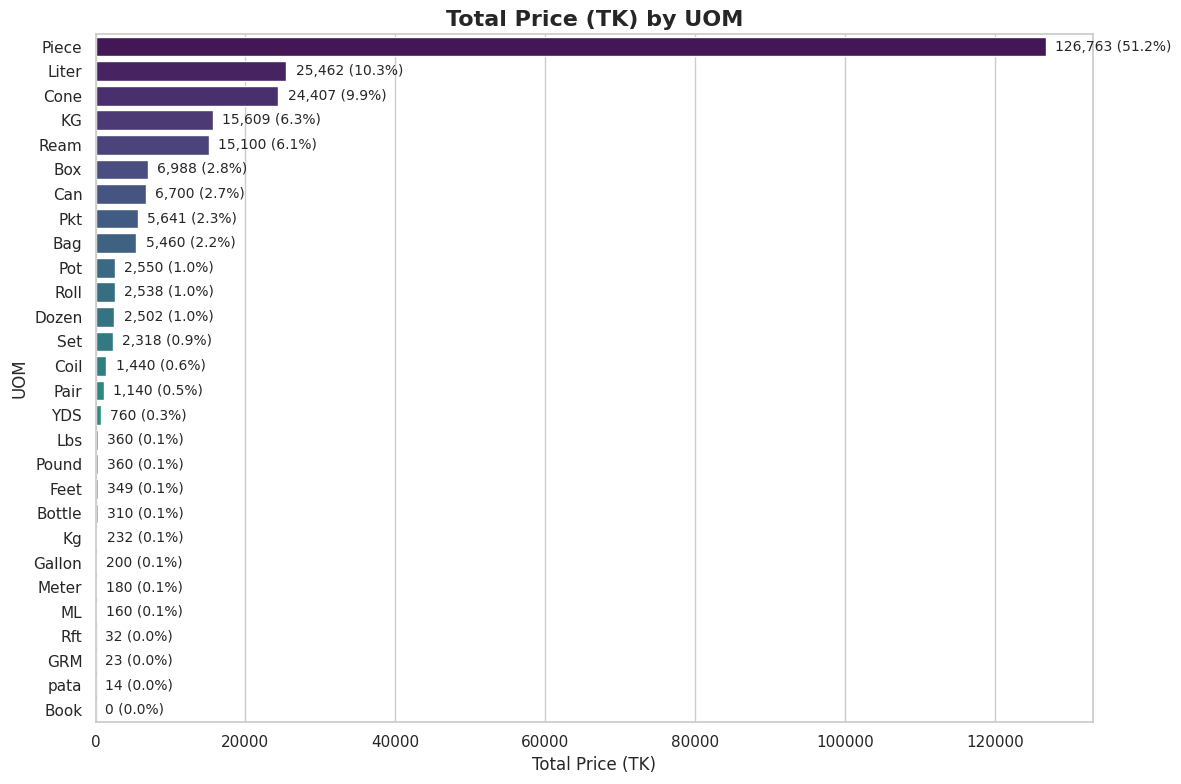

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
uom_price = (
    df.groupby('UOM')['Price_TK']
    .sum()
    .reset_index()
    .sort_values('Price_TK', ascending=False)
)
total_sum = uom_price['Price_TK'].sum()

# Set style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Price_TK',
    y='UOM',
    data=uom_price,
    palette='viridis'
)

# Add labels on bars
for i, (value, uom) in enumerate(zip(uom_price['Price_TK'], uom_price['UOM'])):
    ax.text(
        value + total_sum * 0.005,  # little offset
        i,
        f"{value:,.0f} ({value/total_sum:.1%})",
        va='center',
        fontsize=10
    )

# Titles and labels
plt.title('Total Price (TK) by UOM', fontsize=16, fontweight='bold')
plt.xlabel('Total Price (TK)', fontsize=12)
plt.ylabel('UOM', fontsize=12)

plt.tight_layout()
plt.show()


In [87]:
mrr_count_per_factory = df.groupby('Factory')['MRR_NO'].nunique()
display(mrr_count_per_factory)

,MRR_NO
Factory,
MFSL,4
MGKFL,98
MGL,2
MGNFL,48
MGNSL,104
MGSL,197
MGSS,3
TMLS,26


/tmp/ipython-input-4162344373.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mrr_count_per_factory.index, y=mrr_count_per_factory.values, palette='viridis')


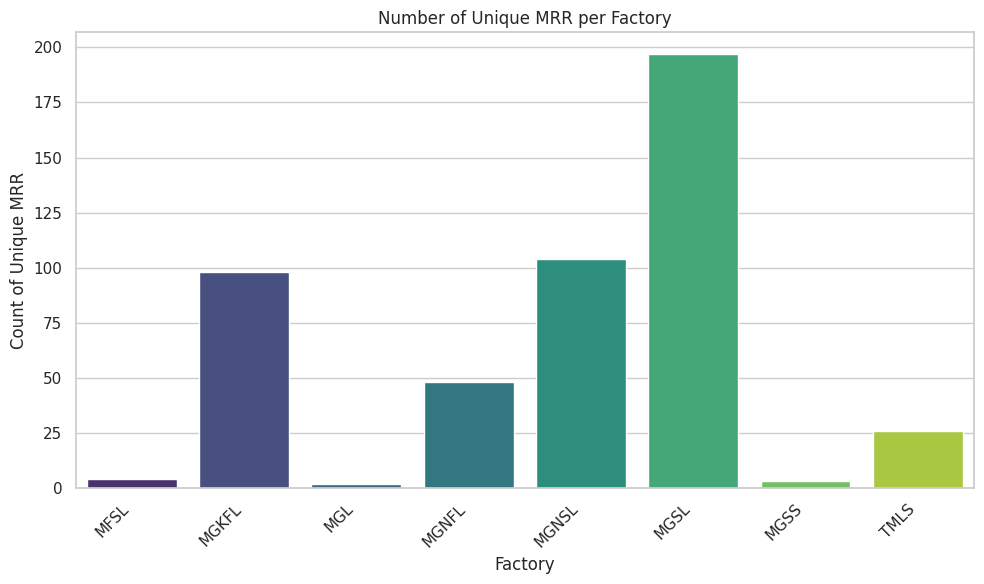

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the MRR count per factory
plt.figure(figsize=(10, 6))
sns.barplot(x=mrr_count_per_factory.index, y=mrr_count_per_factory.values, palette='viridis')
plt.title('Number of Unique MRR per Factory')
plt.xlabel('Factory')
plt.ylabel('Count of Unique MRR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()